# THE SPARKS FOUNDATION 

## GRIP June21 

## Data Science & Business Analytics

## Task1-Predict the percentage of an student based on the no. of study hours.

## Author: Yashika.R

In [27]:
#importing all libraries required in this notebook

In [3]:
import pandas as pd

In [4]:
import numpy as num

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [25]:
#Reading data from remote link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported Successfully")

Data imported Successfully


In [8]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
data.shape

(25, 2)

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
#visualization
# Plotting the distribution of scores

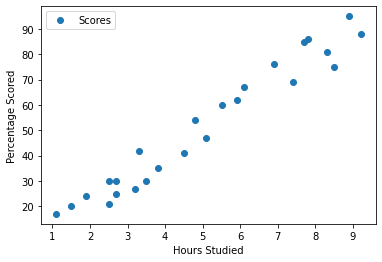

In [13]:
data.plot(x='Hours',y='Scores',style='o')
plt.title=('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

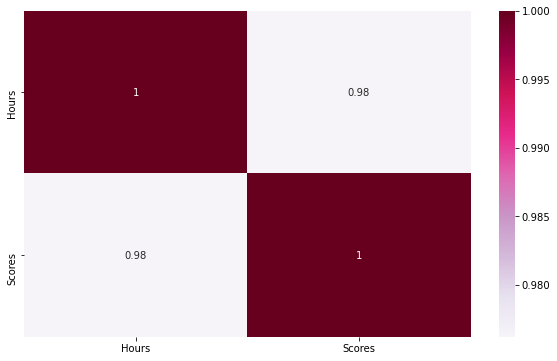

In [14]:
#importing sns

#correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="PuRd",annot_kws={"fontsize":10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Preparing the data

In [15]:
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# x_train & y_train for Train the model
# x_test & y_test for Test/ Predict model
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [18]:
# Check train and test data shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


## Training the Algorithm

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Training Complete...")

Training Complete...


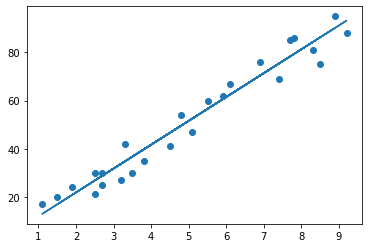

In [20]:
# Plotting the regression line
line=reg.coef_*X+reg.intercept_
#Plotting the test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

## Making Predictions

In [ ]:
#Testing data -In Hours
print(X_test)
#Predicting the scores
y_pred=reg.predict(X_test)

In [22]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
hours=9.25
pred=reg.predict(num.array(hours).reshape(-1,1))
print("No of Hours={}".format(hours))
print("Predicted Score={}".format(pred[0]))

No of Hours=9.25
Predicted Score=93.69173248737538


## Evaluating the model

In [24]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',num.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  4.18385989900298
Mean Squared Error:  21.598769307217413
Root Mean Squared Error:  4.647447612100368
